# Linear Regression

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook')
np.random.seed(12345)
rc = {'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.labelsize': 10, 'font.size': 10, 
      'legend.fontsize': 12.0, 'axes.titlesize': 10, "figure.figsize": [14, 6]}
sns.set(rc = rc)
sns.set_style("whitegrid")

## Step 1: Prepare the data

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

## Step 2: Build the model

In [6]:
with pm.Model() as lm:
    
    # specify the priors
    alpha = pm.Normal("alpha", mu = 0, sd = 1)
    beta = pm.Normal("beta", mu = 0, sd = 1, shape = 2)
    sigma = pm.HalfCauchy("sigma", beta = 1)
    
    # specify the expected value mu
    mean = alpha + beta[0]*X1 + beta[1]*X2
    
    # specifiy the likelhood
    obs = pm.Normal("obs", mu = mean, sd = sigma, observed = Y)

## Step 3: Sample from the posterior

In [20]:
with lm:
    # obtain starting values via MAP
    start = pm.find_MAP()
    
    step = pm.NUTS(target_accept = 0.99)
    posterior = pm.sample(draws = 5000, njobs = 4, tune = 1000, start = start, step = step)

logp = -144.46, ||grad|| = 13.945: 100%|██████████| 17/17 [00:00<00:00, 1140.56it/s] 
100%|██████████| 6000/6000 [00:26<00:00, 229.10it/s]


## Step 4: Diagnose the convergence of MCMC chains

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fded0cd4c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fded1000cf8>]], dtype=object)

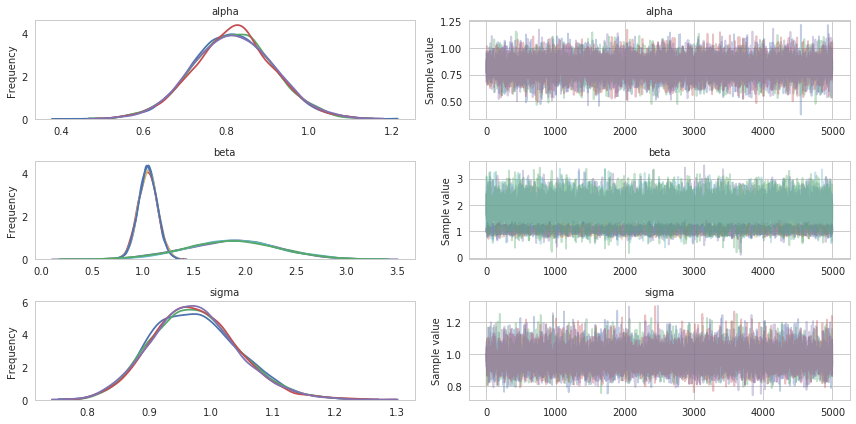

In [21]:
pm.traceplot(posterior)

In [9]:
pm.gelman_rubin(posterior)

{'alpha': 0.99996231332049201,
 'beta': array([ 0.99996388,  0.99993504]),
 'sigma': 1.0001310976952555}

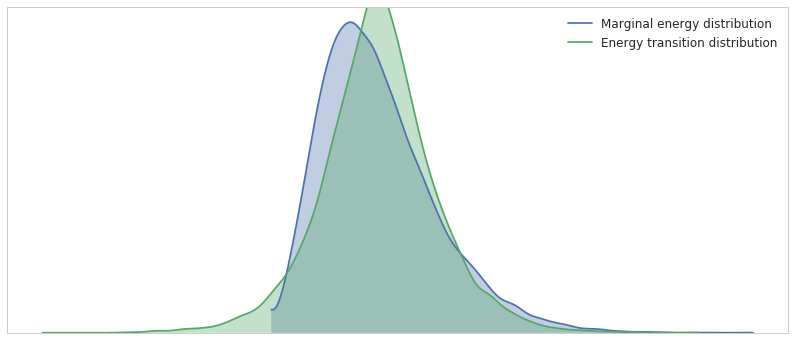

In [10]:
pm.energyplot(posterior)

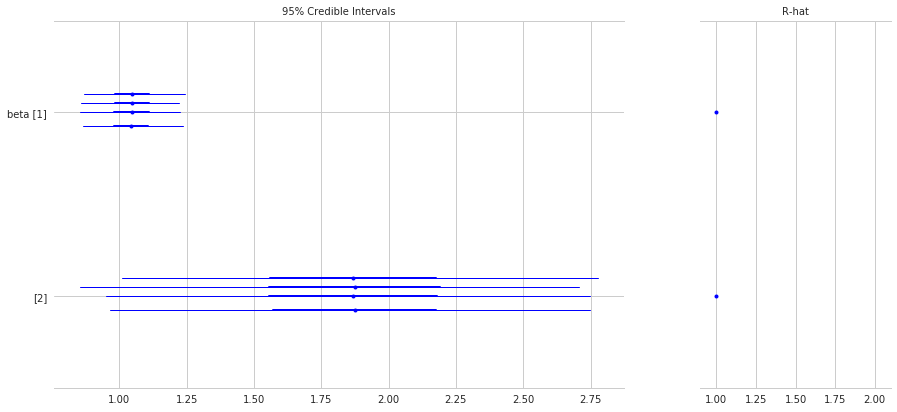

In [12]:
pm.forestplot(posterior, varnames = ["beta"])

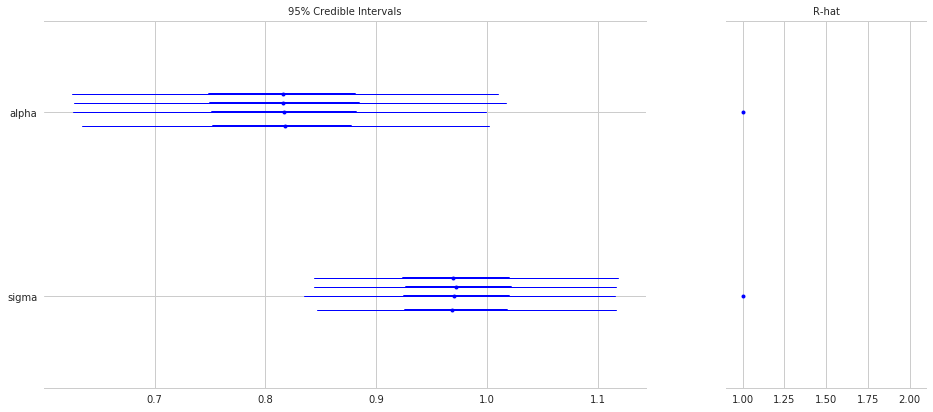

In [13]:
pm.forestplot(posterior, varnames = ["alpha", "sigma"])

## Step 5: Criticize the model

In [22]:
pm.summary(posterior)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.816823,0.097693,0.000742,0.629910,1.014622,15933.0,1.000010
beta__0,1.044749,0.094792,0.000637,0.860475,1.235482,17664.0,0.999939
beta__1,1.872024,0.455091,0.003278,0.993283,2.779582,18513.0,1.000042
sigma,0.973974,0.070880,0.000535,0.840440,1.115674,17537.0,0.999936


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdee405d588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fdee4ba5048>], dtype=object)

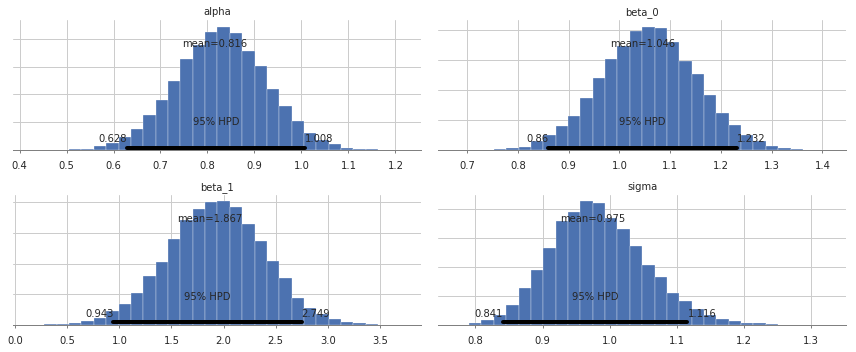

In [17]:
pm.plot_posterior(posterior)